
Isolation Forest Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.10      0.60      0.18       492

    accuracy                           0.99    284807
   macro avg       0.55      0.80      0.59    284807
weighted avg       1.00      0.99      0.99    284807

Accuracy: 0.9903408272970818


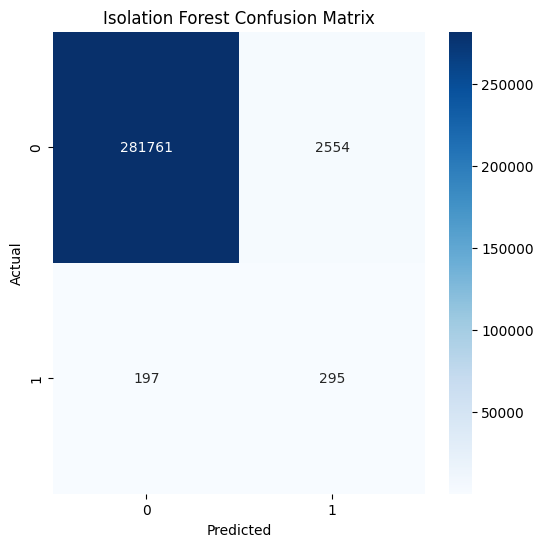


Autoencoder Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    284315
           1       0.11      0.62      0.18       492

    accuracy                           0.99    284807
   macro avg       0.55      0.80      0.59    284807
weighted avg       1.00      0.99      0.99    284807

Accuracy: 0.9903970056915736


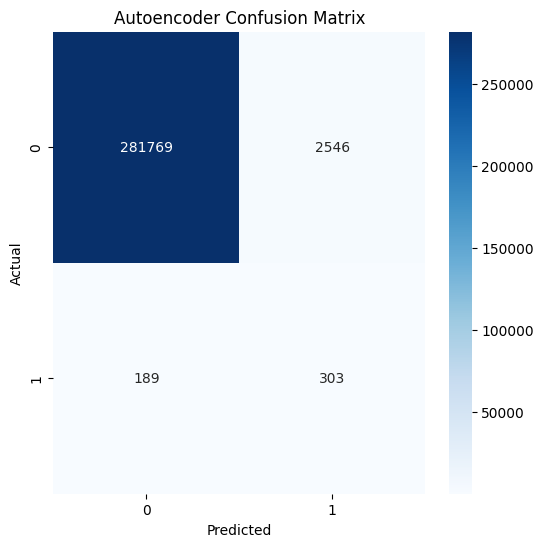


LOF Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    284315
           1       0.01      0.05      0.02       492

    accuracy                           0.99    284807
   macro avg       0.50      0.52      0.51    284807
weighted avg       1.00      0.99      0.99    284807

Accuracy: 0.9884588510816097


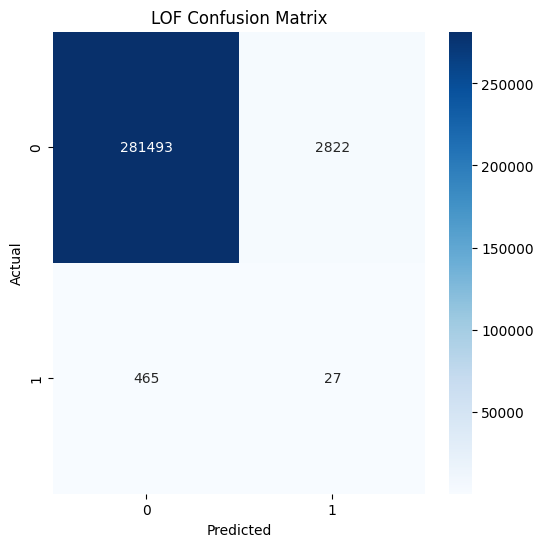

Model evaluation completed.


In [2]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed dataset
data = pd.read_csv('../data/processed_data.csv')
X = data.drop(columns=['Class'])
y_true = data['Class']

# Load predictions from previous models
iso_preds = pd.read_csv('../results/isolation_forest_predictions.csv')
auto_preds = pd.read_csv('../results/autoencoder_predictions.csv')
lof_preds = pd.read_csv('../results/lof_predictions.csv')

# Evaluate each model
models = {'Isolation Forest': iso_preds, 'Autoencoder': auto_preds, 'LOF': lof_preds}
for model_name, preds in models.items():
    print(f"\n{model_name} Evaluation:")
    print(classification_report(y_true, preds['Predicted']))
    print("Accuracy:", accuracy_score(y_true, preds['Predicted']))
    cm = confusion_matrix(y_true, preds['Predicted'])
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

print("Model evaluation completed.")